<a href="https://colab.research.google.com/github/raul-miranda/DS-201-Project-1/blob/main/Project_1_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
### On the Problem of Predicting Whether a Candidate is Ready To Leave their Job

## Introduction

In [64]:
# Human resource departments at companies and institutions face the usual challenge of sorting 
# hundreds to thousands of applications to identify those candidates who are most likely to leave
# their present employment. Although a decision to leave depends strongly on the offer received,
# experience determines that candidates have various levels of predisposition based only on
# their current circumstances. Ranking candidates according to that predisposition allows HR departments 
# to focus their resources on those candidates that are most likely to change jobs.
#
# To start exploring this problem, Team 4 selected a dataset from Kaggle titled "HR Analytics: Job Change 
# of Data Scientists." https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists.
# This dataset contains information about a large pool of potential candidates at a hypothetical company. 
# That information includes their gender, relevant experience, education level, current company type 
# and size, city index of development, years since been hired for the last job, etc., and the
# expressed desire to either leave their current position or likely to stay in it.
# 
# The purpose of our project is to do Exploratory Data Analysis to examine the database, and then 
# determine what features appear as better determinant of the outcome for each candidate in the
# database: likely to leave or likely to stay.  Full statistical analysis to generate a 
# model capable of predicting the binary outcome from mostly categorical variables, is outside 
# the project scope at this stage.

# The questions to investigate are:
# Which gender is most probable to leave their current job?
# What type of company will employees most likely leave?
# Does more training time lead to candidates more likly to leave their current job?
# Are people likely to change their jobs when they have experience that is more relevant to the position?

In [65]:
# Data Features

# The features of the data are as follows:
#
# enrollee_id : Unique ID for candidate - categorical 
# city: City code - discrete
# city_development_index : Development index of the city (scaled) - continuous 
# gender: Gender of candidate - categorical
# relevant_experience: Relevant experience of candidate - categorical
# enrolled_university: Type of University course enrolled if any - categorical
# education_level: Education level of candidate - categorical
# major_discipline: Education major discipline of candidate - categorical
# experience: Candidate total experience in years - discrete
# company_size: No of employees in current employer's company - discrete
# company_type : Type of current employer - categorical
# lastnewjob: Difference in years between previous job and current job -4 discrete
# training_hours: training hours completed - continuous
# target: 0 – Not looking for job change, 1 – Looking for a job change - binary

In [66]:
## Prepare and Wrangle Data

In [67]:
# Import all the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [68]:
# Download source files into google colab drive, from desktop; the alternative is to read directly from kaggle

from google.colab import files
target = files.upload()

Saving aug_test.csv to aug_test (1).csv
Saving aug_train.csv to aug_train (1).csv
Saving jobchange_test_target_values.npy to jobchange_test_target_values (1).npy


In [69]:
# Check: list files in google colab current directory
import os
from os import listdir

for f in os.listdir('.'):
  if os.path.isfile(f):
    print(f)

aug_train (1).csv
jobchange_test_target_values (1).npy
jobchange_test_target_values.npy
aug_train.csv
aug_test.csv
aug_test (1).csv


In [70]:
# Load the target data for the test set, provided as a numpy array
target =  np.load('jobchange_test_target_values.npy')

In [71]:
len(target)

2129

In [72]:
# Load the test set, provided as a CSV file

testdata = pd.read_csv('aug_test.csv',sep=',')

In [73]:
len(testdata)

2129

In [74]:
# Correct typo in 'relevent'
testdata['relevent_experience'] = testdata['relevent_experience'].str.replace('relevent', 'relevant')
testdata.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})

In [75]:
testdata[0:5]  # test data without the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [76]:
target[:5]   #   target array

array([1., 0., 1., 0., 1.])

In [77]:
#  Append the column with targets to testdata 
testdata['target'] = target    

In [78]:
testdata[:5]  #  test data with the target column

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,32403,city_41,0.827,Male,Has relevant experience,Full time course,Graduate,STEM,9,<10,NaN,1,21,1.0
1,9858,city_103,0.920,Female,Has relevant experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0.0
2,31806,city_21,0.624,Male,No relevant experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15,1.0
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0


In [79]:
# Load the training set, provided as a CSV file
training = pd.read_csv('aug_train.csv',sep=',')

In [80]:
len(training)

19158

In [81]:
# Correct typo in 'relevent'
training['relevent_experience'] = training['relevent_experience'].str.replace('relevent', 'relevant')
training.rename (inplace=True, columns={'relevent_experience':'relevant_experience'})
training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevant experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevant experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [82]:
# Save the test set with target column included
testdata.to_csv ('aug_test1.csv', sep = ',')

In [83]:
# Checking to see how many null values
training.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevant_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [157]:
# Dropping all the nulls 
new_training = training.dropna()

In [130]:
# Viewing new dataset
new_training.shape

(8955, 14)

In [158]:
# Checking that there are no more nulls
new_training.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [132]:
# Viewing head of new data
new_training.head()

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
4,666,city_162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
7,402,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
11,23853,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [88]:
## Use EDA principles and the Matplotlib / Seaborn packages to visualize the data

In [155]:
new_training.value_counts('target')

target
0.0    7472
1.0    1483
dtype: int64

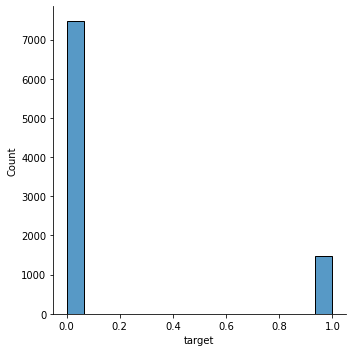

In [90]:
# Counting the amount of target data, showing its imbalanced
sns.displot(new_training['target'])
plt.show()

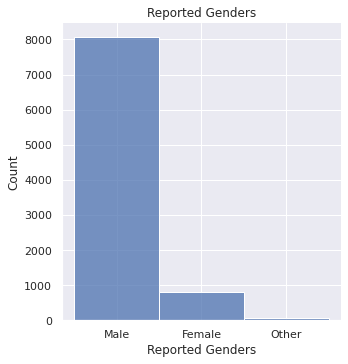

In [91]:
# Graph of the number of genders reported in dataset
sns.set_theme(style="darkgrid")
sns.displot(new_training['gender'])
plt.xlabel('Reported Genders')
plt.ylabel('Count')
plt.title('Reported Genders')
plt.show()

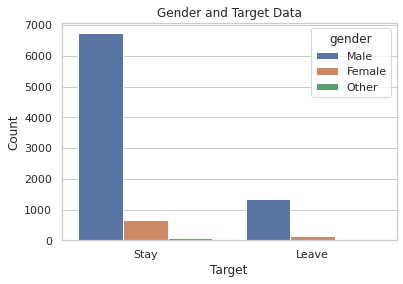

In [92]:
# Graph of counting the number of people who are willing to leave/stay based on gender
sns.set_theme(style="whitegrid")
sns.countplot(x='target',hue='gender',data=new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Gender and Target Data')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

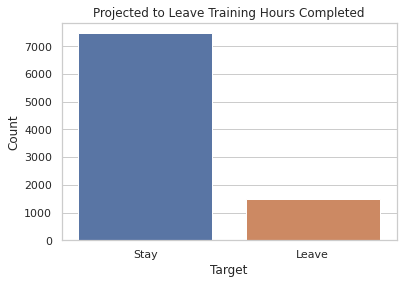

In [93]:
# Bargraph of the number of people who are willing to leave/stay in dataset
sns.countplot(x='target', data = new_training)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Projected to Leave Training Hours Completed')
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.show()

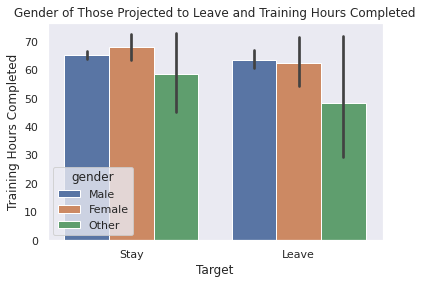

In [94]:
# Barplot of the genders of people who are willing to leave/stay and the training hours completed
sns.set_theme(style="dark")
sns.barplot(x="target", y="training_hours", hue="gender", data=new_training)
plt.xticks([0.0, 1.0], ['Stay', 'Leave'])
plt.xlabel('Target')
plt.ylabel('Training Hours Completed')
plt.title('Gender of Those Projected to Leave and Training Hours Completed')
plt.show()

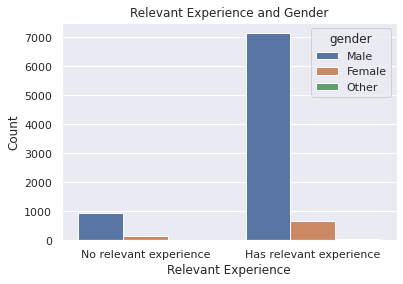

In [95]:
# Bargraph counting those with relevant experience based on gender
sns.set_theme(style="darkgrid")
sns.countplot(x='relevant_experience', hue = 'gender',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience and Gender')
plt.show()

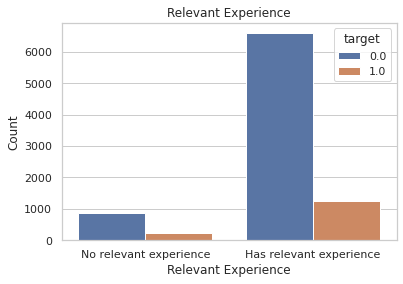

In [96]:
# Bargraph counting those who have relevent experience based on likelihood of leaving/staying
sns.set_theme(style="whitegrid")
sns.countplot(x='relevant_experience', hue ='target',data=new_training)
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.title('Relevant Experience')
plt.show()

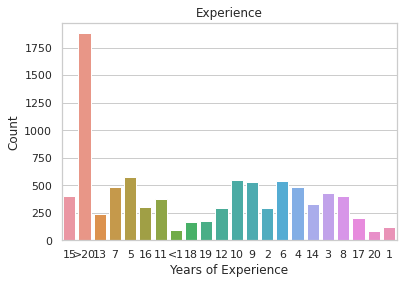

In [97]:
# Graph on how many different years of experiences employeees have
# re-arrange
sns.countplot(x='experience',data=new_training)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Experience')
plt.show()

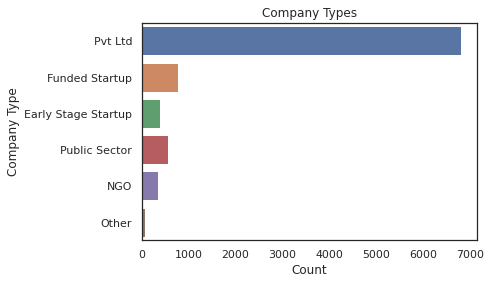

In [98]:
# Graph counting the types of companies in dataset
sns.set_theme(style="white")
sns.countplot(y='company_type',data=new_training)
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Types')
plt.show()

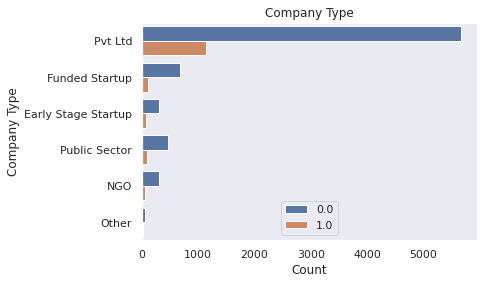

In [99]:
# Graph counting the types of companies and how many employees are/are not willing to leave
sns.set_theme(style="dark")
sns.countplot(y='company_type',hue= 'target', data=new_training)
plt.legend(loc='lower center')
plt.xlabel('Count')
plt.ylabel('Company Type')
plt.title('Company Type')
plt.show()

Median of the original training set:  47.0
Bootstrap median (red line):  47.0
95% Confidence interval (yellow lines): [44. 50.]


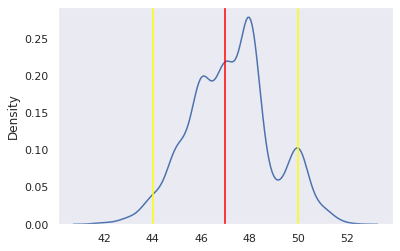

In [100]:
# Simulate a nonparametric inference of the Median for a quantitative variable
# (bootstrapping inference of median of 'training_hours' array)

print ("Median of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []
for i in range (1000):
  boot_sample = np.random.choice(training['training_hours'], 1000)
  median_boot_samples.append(np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("Bootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

conf_int = np.percentile(median_boot_samples, [2.5, 97.5])     #confidence interval, central 95%
print ("95% Confidence interval (yellow lines):", conf_int)

sns.kdeplot (median_boot_samples)      # plot the distribution, indicate median, conf. int.
plt.axvline (bootstrap_median, color = 'red')
for ends in conf_int:
  plt.axvline (ends, color = 'yellow')


In [101]:
## implement bootstrapping to infer the median of 'training_hours', using sklearn resample
from sklearn.utils import resample

print ("Median of the original training set: ", training['training_hours'].median())   #  original sample median

median_boot_samples = []

for i in range (100):
  boot_sample = resample(training['training_hours'], replace=True, random_state=1)
  median_boot_samples.append (np.median(boot_sample))

bootstrap_median = np.median(median_boot_samples)
print ("Bootstrap median (red line): ", bootstrap_median)        # compare bootstrap median with original

Median of the original training set:  47.0
Bootstrap median (red line):  47.0


In [102]:
# Calculate probability of leaving for each category,  defined as P = Leave/(Leave+Stay)


In [103]:
counts = new_training.groupby(['gender','target']).size().reset_index(name='counts')
counts


,gender,target,counts
0,Female,0.0,673
1,Female,1.0,131
2,Male,0.0,6733
3,Male,1.0,1340
4,Other,0.0,66
5,Other,1.0,12


In [104]:
Pfem = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmal = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Poth = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities for females: ', Pfem, '; males: ', Pmal,'; Other: ', Poth)

Probabilities for females:  0.16293532338308458 ; males:  0.16598538337668772 ; Other:  0.15384615384615385


In [105]:
counts = new_training.groupby(['education_level','target']).size().reset_index(name='counts')
counts

,education_level,target,counts
0,Graduate,0.0,5160
1,Graduate,1.0,1092
2,Masters,0.0,2092
3,Masters,1.0,357
4,Phd,0.0,220
5,Phd,1.0,34


In [106]:
Pgra = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmst = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphd = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities for Graduates: ', Pgra,'; Masters: ', Pmst,'; PhDs: ', Pphd)

Probabilities for Graduates:  0.1746641074856046 ; Masters:  0.14577378521845652 ; PhDs:  0.13385826771653545


In [107]:
# Probabilities for subcategories:   gender in each education_level

counts = new_training.groupby(['education_level','gender','target']).size().reset_index(name='counts')
counts

,education_level,gender,target,counts
0,Graduate,Female,0.0,441
1,Graduate,Female,1.0,85
2,Graduate,Male,0.0,4669
3,Graduate,Male,1.0,995
4,Graduate,Other,0.0,50
5,Graduate,Other,1.0,12
6,Masters,Female,0.0,194
7,Masters,Female,1.0,42
8,Masters,Male,0.0,1882
9,Masters,Male,1.0,315


In [110]:
Pgraf = counts.loc[1,'counts'] / (counts.loc[0,'counts'] + counts.loc[1,'counts'])
Pmstf = counts.loc[7,'counts'] / (counts.loc[6,'counts'] + counts.loc[3,'counts'])
Pphdf = counts.loc[12,'counts'] / (counts.loc[11,'counts'] + counts.loc[5,'counts'])
Pgram = counts.loc[3,'counts'] / (counts.loc[2,'counts'] + counts.loc[1,'counts'])
Pmstm = counts.loc[9,'counts'] / (counts.loc[8,'counts'] + counts.loc[3,'counts'])
Pphdm = counts.loc[14,'counts'] / (counts.loc[13,'counts'] + counts.loc[5,'counts'])
Pgrao = counts.loc[5,'counts'] / (counts.loc[4,'counts'] + counts.loc[1,'counts'])
Pmsto = 0. / (counts.loc[2,'counts'] + counts.loc[3,'counts'])
Pphdo = 0. / (counts.loc[4,'counts'] + counts.loc[5,'counts'])
print ('Probabilities for female graduates: ', Pgraf,'; female masters: ', Pmstf,'; female PhDs:', Pphdf)
print ('Probabilities for male graduates: ', Pgram,'; male masters: ', Pmstm,'; male PhDs:', Pphdm)
print ('Probabilities for other graduates: ', Pgrao,'; other masters: ', Pmsto,'; other PhDs:', Pphdo)

Probabilities for female graduates:  0.16159695817490494 ; female masters:  0.03532380151387721 ; female PhDs: 0.08
Probabilities for male graduates:  0.20929743374000842 ; male masters:  0.10948905109489052 ; male PhDs: 0.15463917525773196
Probabilities for other graduates:  0.08888888888888889 ; other masters:  0.0 ; other PhDs: 0.0


In [111]:
# Looking at other categorical variables: major_discipline and the average target (1: likely to leave)
new_training.drop('enrollee_id', axis=1).groupby('major_discipline').mean()

,city_development_index,training_hours,target
major_discipline,,,
Arts,0.907961,56.224806,0.069767
Business Degree,0.878659,70.482353,0.123529
Humanities,0.900392,66.124339,0.105820
No Major,0.863777,59.687500,0.133929
Other,0.860650,61.728814,0.107345
STEM,0.839554,65.202779,0.172612


In [112]:
# Looking at other categorical variables: company_type and the average target
new_training.drop('enrollee_id', axis=1).groupby('company_type').mean()

,city_development_index,training_hours,target
company_type,,,
Early Stage Startup,0.807151,69.441558,0.202597
Funded Startup,0.853381,67.178571,0.137755
NGO,0.856022,63.117978,0.154494
Other,0.870667,69.305556,0.208333
Public Sector,0.871012,59.132979,0.166667
Pvt Ltd,0.842602,65.135708,0.166765


In [113]:
# Looking at other categorical variables: relevant_experience and the average target
new_training.drop('enrollee_id', axis=1).groupby('relevant_experience').mean()

,city_development_index,training_hours,target
relevant_experience,,,
Has relevant experience,0.844350,65.472042,0.160489
No relevant experience,0.846132,62.250906,0.201993


In [173]:
# Plotting the years of experience against average target

dftemp = new_training.drop('enrollee_id', axis=1).groupby('experience', as_index=False)['target'].mean()
dftemp.loc[dftemp.experience == '>20', 'experience'] = 25
dftemp.loc[dftemp.experience == '<1', 'experience'] = 0.5
dftemp.experience = pd.to_numeric(dftemp.experience)
dftemp

,experience,target
0,1.0,0.429752
1,10.0,0.156080
2,11.0,0.134409
3,12.0,0.126280
4,13.0,0.153191
5,14.0,0.129129
6,15.0,0.125628
7,16.0,0.098684
8,17.0,0.131068
9,18.0,0.071429


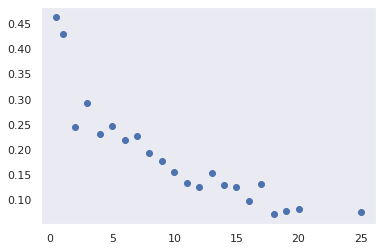

In [174]:
x, y = dftemp.experience, dftemp.target

plt.scatter(x, y, marker='o') ;

In [116]:
# Getting basic statistics on city development index
new_training['city_development_index'].describe()

count    8955.000000
mean        0.844570
std         0.116178
min         0.448000
25%         0.794000
50%         0.910000
75%         0.920000
max         0.949000
Name: city_development_index, dtype: float64

In [117]:
# Binning the city_development_index to create 'City_class" and examine average target for each class
bins = [0.4,.82,.919,.92,.96]
labels = ['.40-.82', '.821-.91','.911-.930','.931-.960']
new_training['City_class'] = pd.cut(new_training.city_development_index, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('City_class', as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,City_class,city_development_index,experience,training_hours,target
0,.40-.82,0.670677,7.753785,65.545822,0.376665
1,.821-.91,0.891245,10.053611,63.705711,0.076282
2,.911-.930,0.920000,9.728141,65.775380,0.094093
3,.931-.960,0.928850,10.453450,65.185304,0.080671


In [153]:
# Creating 'Training_hr' as bins of training hours to examine mean target for each class
new_training['experience'].describe()

count    6977.000000
mean        9.272753
std         4.887231
min         1.000000
25%         5.000000
50%         9.000000
75%        13.000000
max        20.000000
Name: experience, dtype: float64

In [119]:
bins = [0,5,9,12,16,20]
labels = ['0-5', '5.1-9','9.1-12','12.1-16', '16.1-20']
new_training['Training_hr'] = pd.cut(new_training.training_hours, bins, labels=labels)

new_training.drop('enrollee_id', axis=1).groupby('Training_hr', as_index=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Training_hr,city_development_index,experience,training_hours,target
0,0-5,0.833728,9.198925,3.664000,0.192000
1,5.1-9,0.845561,9.439883,7.493243,0.182432
2,9.1-12,0.844767,9.321070,11.037433,0.171123
3,12.1-16,0.848122,9.981132,14.547500,0.167500
4,16.1-20,0.848012,9.492105,18.480249,0.149688


In [120]:
# Looking at company_type
new_training['company_type'].describe()

count        8955
unique          6
top       Pvt Ltd
freq         6794
Name: company_type, dtype: object

In [121]:
# Looking at years since 'last_new_job'
new_training['last_new_job'].describe()

count     8955
unique       6
top          1
freq      3838
Name: last_new_job, dtype: object

In [122]:
# Implementing sklearn LogisticRegression
#

In [123]:
testdata.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevant_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
target                      0
dtype: int64

In [124]:
new_testdata = testdata.dropna()
new_testdata.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [125]:
new_testdata[:10]

,enrollee_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
3,27385,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0.0
4,27724,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72,1.0
11,9272,city_90,0.698,Male,Has relevant experience,no_enrollment,Graduate,STEM,20,10/49,Pvt Ltd,2,51,1.0
12,14249,city_46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,8,100-500,Other,never,48,0.0
16,7865,city_21,0.624,Male,Has relevant experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,4,0.0
17,7463,city_13,0.827,Male,Has relevant experience,no_enrollment,Masters,Business Degree,2,50-99,Pvt Ltd,1,31,1.0
22,25202,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,6,1000-4999,Pvt Ltd,3,33,1.0
24,23570,city_118,0.722,Male,Has relevant experience,no_enrollment,Graduate,STEM,19,100-500,Pvt Ltd,>4,19,0.0
26,9548,city_114,0.926,Male,Has relevant experience,no_enrollment,Masters,STEM,>20,50-99,Pvt Ltd,>4,65,0.0
33,17189,city_21,0.624,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,10000+,Pvt Ltd,4,43,0.0


In [186]:
# Prepare data for LogisticRegression method, requiring all numerical predictor variables

new_training2 = new_training.append(new_testdata)     # append training and testing originally provided - gives lower accuracy than training set
new_training2 = new_training.drop(['enrollee_id'], axis=1)     #  drop enrollee_id, not used as predictor
new_training2[:10]
new_training2[4:10]

,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
11,city_103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0
12,city_61,0.913,Male,Has relevant experience,no_enrollment,Graduate,STEM,>20,1000-4999,Pvt Ltd,3,23,0.0
15,city_114,0.926,Male,Has relevant experience,no_enrollment,Graduate,STEM,16,10/49,Pvt Ltd,>4,18,0.0
20,city_159,0.843,Male,Has relevant experience,no_enrollment,Masters,STEM,11,100-500,Pvt Ltd,1,68,0.0
21,city_114,0.926,Male,Has relevant experience,no_enrollment,Masters,STEM,11,100-500,Pvt Ltd,2,50,0.0
23,city_40,0.776,Male,Has relevant experience,no_enrollment,Graduate,Humanities,<1,1000-4999,Pvt Ltd,1,65,0.0


In [187]:
new_training2.shape
new_training2.isnull().sum()

city                      0
city_development_index    0
gender                    0
relevant_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [188]:
# Convert columns that contain mixed characters and numbers to numbers
#   so that these columns will now be numeric: 'experience','city','company_size','last_new_job'

new_training2.loc[new_training2.experience == '<1','experience'] = "0"   
new_training2.loc[new_training2.experience == '>20','experience'] = "25"   # numeric assignment of >20 to 25
new_training2['city'] = new_training2['city'].str.replace('city_', '')        #convert city codes to numbers
new_training2.loc[new_training2.company_size == '<10','company_size'] = "5"   # numeric assignment of <10 to 5
new_training2.loc[new_training2.company_size == '10000+','company_size'] = "12000"   # numeric assignment of >10000 to 13000
new_training2.loc[new_training2.company_size == '10/49','company_size'] = "30"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '50-99','company_size'] = "75"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '100-500','company_size'] = "300"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '500-999','company_size'] = "750"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '1000-4999','company_size'] = "3000"   # numeric assignment of range to the average
new_training2.loc[new_training2.company_size == '5000-9999','company_size'] = "7500"  # numeric assignment of range to the average
new_training2.loc[new_training2.last_new_job == '>4','last_new_job'] = "5" # numeric assignment of >4 to 5
new_training2.loc[new_training2.last_new_job == 'never','last_new_job'] = "0" # numeric assignment of never to 0
new_training2[['experience','city','company_size','last_new_job','training_hours']] = new_training2[['experience','city','company_size','last_new_job','training_hours']].apply(pd.to_numeric)
new_training2[:10]


,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,40,0.776,Male,No relevant experience,no_enrollment,Graduate,STEM,15,75,Pvt Ltd,5,47,0.0
4,162,0.767,Male,Has relevant experience,no_enrollment,Masters,STEM,25,75,Funded Startup,4,8,0.0
7,46,0.762,Male,Has relevant experience,no_enrollment,Graduate,STEM,13,5,Pvt Ltd,5,18,1.0
8,103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,7,75,Pvt Ltd,1,46,1.0
11,103,0.920,Male,Has relevant experience,no_enrollment,Graduate,STEM,5,7500,Pvt Ltd,1,108,0.0
12,61,0.913,Male,Has relevant experience,no_enrollment,Graduate,STEM,25,3000,Pvt Ltd,3,23,0.0
15,114,0.926,Male,Has relevant experience,no_enrollment,Graduate,STEM,16,30,Pvt Ltd,5,18,0.0
20,159,0.843,Male,Has relevant experience,no_enrollment,Masters,STEM,11,300,Pvt Ltd,1,68,0.0
21,114,0.926,Male,Has relevant experience,no_enrollment,Masters,STEM,11,300,Pvt Ltd,2,50,0.0
23,40,0.776,Male,Has relevant experience,no_enrollment,Graduate,Humanities,0,3000,Pvt Ltd,1,65,0.0


In [189]:
#  Use pd.get_dummies to convert categorical variables to numeric

In [190]:
new_training3 = pd.get_dummies(new_training2, columns=['gender','relevant_experience','enrolled_university','education_level','major_discipline','company_type'])
new_training3[:10]

,city,city_development_index,experience,company_size,last_new_job,training_hours,target,gender_Female,gender_Male,gender_Other,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_Masters,education_level_Phd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,40,0.776,15,75,5,47,0.0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,162,0.767,25,75,4,8,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
7,46,0.762,13,5,5,18,1.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
8,103,0.920,7,75,1,46,1.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
11,103,0.920,5,7500,1,108,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
12,61,0.913,25,3000,3,23,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
15,114,0.926,16,30,5,18,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
20,159,0.843,11,300,1,68,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
21,114,0.926,11,300,2,50,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
23,40,0.776,0,3000,1,65,0.0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
#  Use these lines to add columns of 0's for other educational levels that may exist in test data
#new_training3['education_level_High_School'] = 0
#new_training3['education_level_Primary_School'] = 0
#new_training3

In [191]:
#  Allocate the target variable to the y array and the predictor variables to the X array

y = new_training3['target']
X = new_training3.drop(['target'], axis=1)

#  Use  sklearn train_test_split to create the training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print ("X_train shape: ", X_train.shape)
print ("y_train shape: ", y_train.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train)

X_train shape:  (7164, 29)
y_train shape:  (7164,)
X_test shape:  (1791, 29)
y_test shape:  (1791,)


pandas.core.frame.DataFrame

In [182]:
# Instantiate a  class of sklearn LogisticRegression 
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train, y_train)
# Use the model to predict the target of the test set, on the basis of the categorical variables in the test set
y_pred = pd.Series(model.predict(X_test))


In [192]:
# print some fitting results

print ('\nIntercept: ', model.intercept_)
print ('\nCoefficients: ', model.coef_, end='\n\n')


Intercept:  [0.4094028]

Coefficients:  [[-6.52205497e-03 -3.89731857e+00 -4.90535601e-02  1.56072098e-05
   5.71372716e-02 -3.49489084e-04  5.81457805e-02  2.16422292e-01
   1.33364691e-01  1.52324930e-01  2.55607834e-01  5.99242508e-01
  -4.20098972e-01  2.28789227e-01  4.82007691e-02  1.54682717e-01
   2.05049278e-01 -2.67511055e-01 -4.07565984e-02 -2.40994970e-01
  -5.64923192e-02 -3.62914140e-01  1.37660185e+00  8.57693622e-02
  -2.95052872e-01 -2.92458995e-02  2.19399826e-01  3.70795996e-01
   5.62663509e-02]]





Confusion matrix:
 [[1489   22]
 [ 245   35]] 




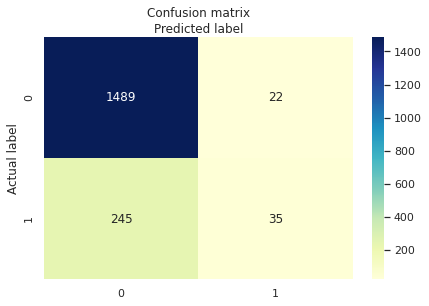

In [193]:
#  Calculate the confusion matrix using sklearn metrics.confusion_matrix method

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)     # confusion matrix calculation
print ('\n\nConfusion matrix:\n', cnf_matrix, '\n\n')
class_names=[0,1] # name  of classes

# graph the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [194]:
# Calculate the Accuracy, Precision, Recall from the confusion matrix, using sklearn metrics methods

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))     # accuracy precision and recall calculation
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8509212730318257
Precision: 0.6140350877192983
Recall: 0.125


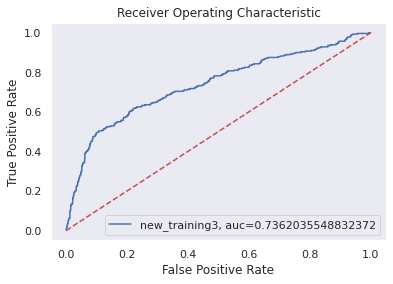

In [195]:
# Calculate and plot the ROC curve from the model predictions versus actual targets, using sklearn metrics methods
y_pred_proba = model.predict_proba(X_test)[::,1]             # predict probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)       # receiver operating characteristic curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)            # true positive against false positive
# graph it
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="new_training3, auc="+str(auc))
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [196]:
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Predictions']
z.iloc[:10]

,True,Predictions
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [197]:
print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1511
         1.0       0.61      0.12      0.21       280

    accuracy                           0.85      1791
   macro avg       0.74      0.56      0.56      1791
weighted avg       0.82      0.85      0.81      1791



In [ ]:
#  Using SMOTE  to  try to resolve the imbalanced target problem


In [198]:
from imblearn.over_sampling import SMOTE

In [148]:
smt = SMOTE (random_state=42, ratio='minority')
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [199]:
# See the new shape

print ("X_train shape: ", X_train_SMOTE.shape)
print ("y_train shape: ", y_train_SMOTE.shape)
print ("X_test shape: ", X_test.shape)
print ("y_test shape: ", y_test.shape)
type(X_train_SMOTE)

X_train shape:  (11922, 29)
y_train shape:  (11922,)
X_test shape:  (1791, 29)
y_test shape:  (1791,)


numpy.ndarray


Intercept:  [1.89547098]

Coefficients:  [[-7.64907436e-04 -7.28852413e+00 -2.98992816e-02  2.20576013e-05
   7.36446533e-02 -1.03087473e-03  6.19836465e-01  6.11406045e-01
   6.39872713e-01  7.94843206e-01  1.07627202e+00  1.24353187e+00
  -2.09116410e-02  6.48494998e-01  9.12276813e-01  2.76020121e-01
   6.82818290e-01  1.60601887e-04  3.15929038e-01  9.70557936e-01
   1.31621943e-02 -5.07158579e-01  1.07846403e+00  2.41548313e-02
   4.11907998e-02  1.95261416e-01  6.23250693e-01  7.25531306e-01
   2.61726179e-01]]



Confusion matrix:
 [[1212  299]
 [ 114  166]] 




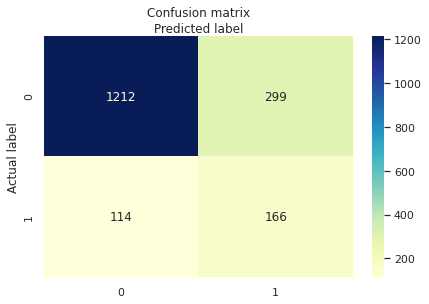



Accuracy: 0.7694025683975433
Precision: 0.35698924731182796
Recall: 0.5928571428571429


               precision    recall  f1-score   support

         0.0       0.91      0.80      0.85      1511
         1.0       0.36      0.59      0.45       280

    accuracy                           0.77      1791
   macro avg       0.64      0.70      0.65      1791
weighted avg       0.83      0.77      0.79      1791
 




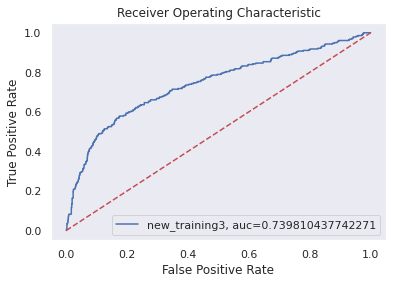

In [200]:
# Repeat the Logistic Regression and Prediction

# Instantiate a  class of sklearn LogisticRegression 
model = LogisticRegression(max_iter=1000)
# Fit the model to the training data
model.fit(X_train_SMOTE, y_train_SMOTE)
# Use the model to predict the target of the test set, on the basis of the categorical variables in the test set
y_pred = pd.Series(model.predict(X_test))

# print some fitting results

print ('\nIntercept: ', model.intercept_)
print ('\nCoefficients: ', model.coef_, end='\n\n')

#  Calculate the confusion matrix using sklearn metrics.confusion_matrix method

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)     # confusion matrix calculation
print ('\n\nConfusion matrix:\n', cnf_matrix, '\n\n')
class_names=[0,1] # name  of classes

# graph the confusion matrix
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Calculate the Accuracy, Precision, Recall from the confusion matrix, using sklearn metrics methods

print("\n\nAccuracy:",metrics.accuracy_score(y_test, y_pred))     # accuracy precision and recall calculation
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print ('\n\n', metrics.classification_report(y_test, y_pred), '\n\n')

# Calculate and plot the ROC curve from the model predictions versus actual targets, using sklearn metrics methods
y_pred_proba = model.predict_proba(X_test)[::,1]             # predict probability
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)       # receiver operating characteristic curve
auc = metrics.roc_auc_score(y_test, y_pred_proba)            # true positive against false positive
# graph it
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="new_training3, auc="+str(auc))
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
